## Implementation of Self-Attention

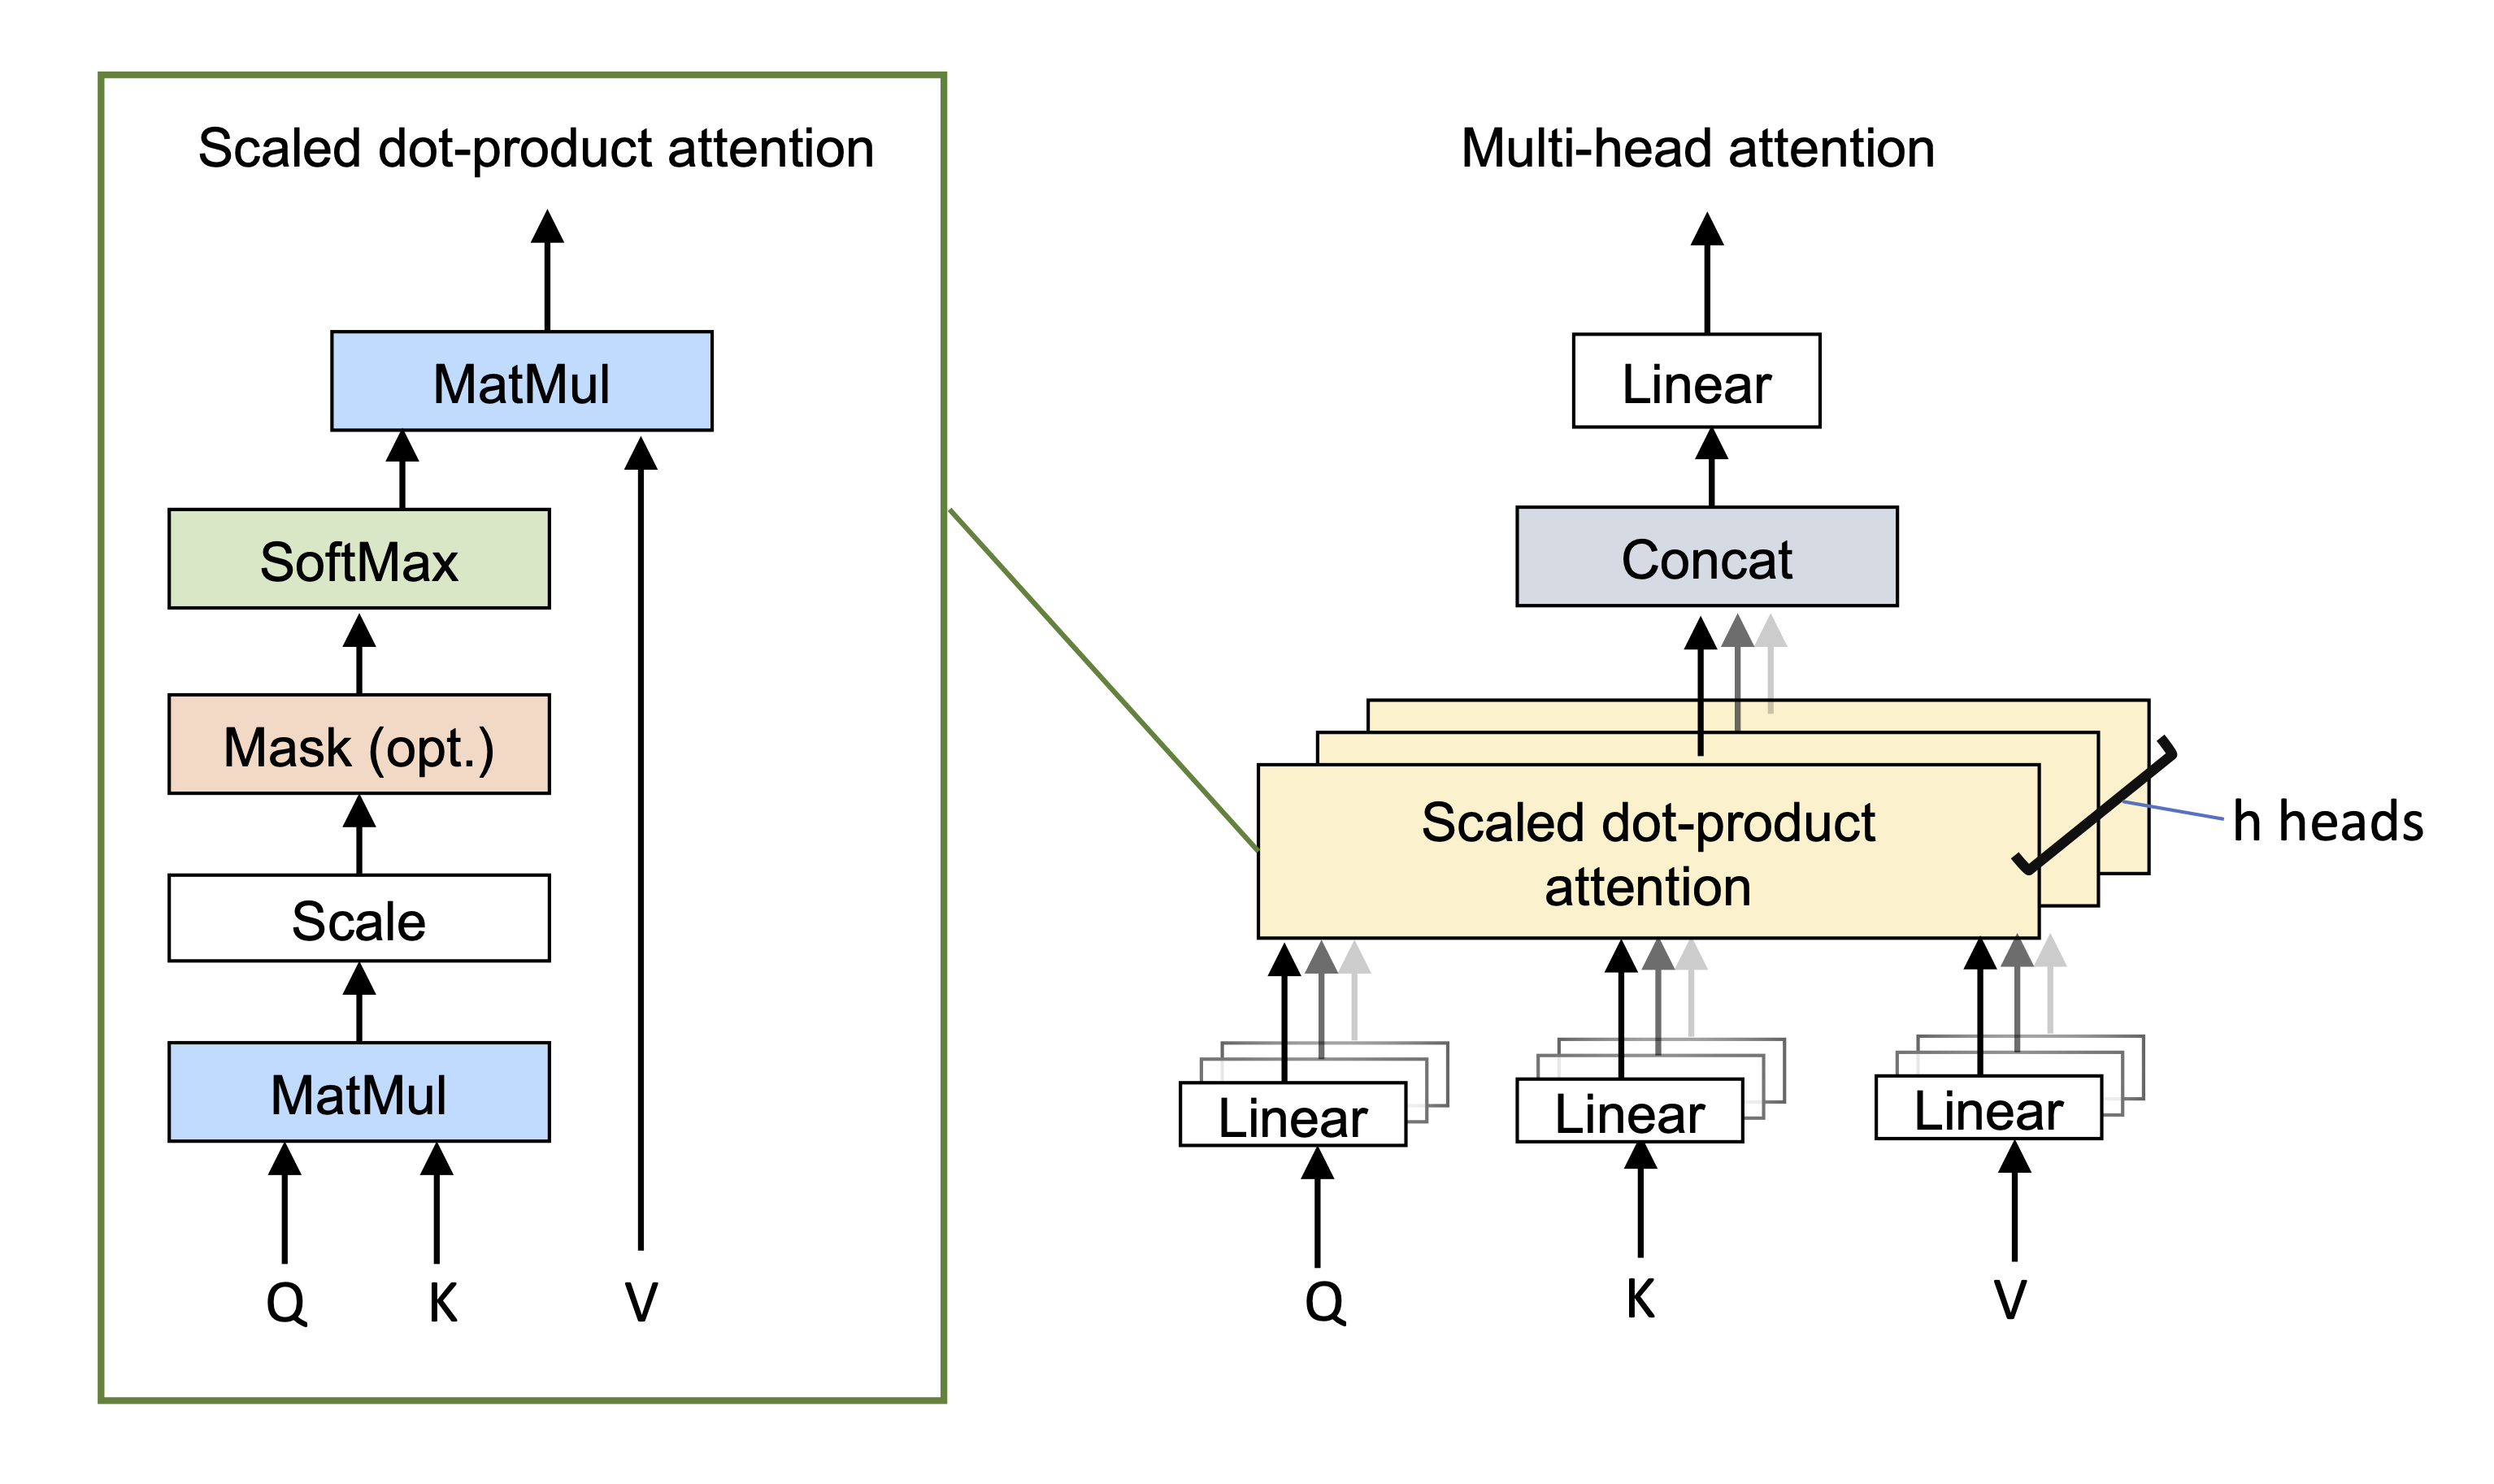

In [42]:
from IPython.display import Image
Image(filename='attention.png', width=700)

### 1. Data Preparation

In [16]:
import torch
import torch.nn as nn
import math
import torch.nn.functional as F

In [1]:
sentence = 'The quick brown fox jumps over a lazy dog'
dc = {s: i for i, s in enumerate(sorted(sentence.replace(',', '').split()))}
print(dc)

{'The': 0, 'a': 1, 'brown': 2, 'dog': 3, 'fox': 4, 'jumps': 5, 'lazy': 6, 'over': 7, 'quick': 8}


In [4]:
#Now, we map the sentence to a tensor of these integer indices
r = [dc[i] for i in sentence.replace(',', '').split()]
sentence_int = torch.tensor(r)
print(sentence_int)

tensor([0, 8, 2, 4, 5, 7, 1, 6, 3])


## 2. Embedding the Sentence

In [13]:
vocab_size = 50000  # Assume a large vocabulary size
embedding_dim = 3   #original paper: 512 
torch.manual_seed(123)
embed = nn.Embedding(vocab_size, embedding_dim)
embedded_sentence = embed(sentence_int).detach()
print(embedded_sentence)
print(embedded_sentence.size())

tensor([[ 0.3374, -0.1778, -0.3035],
        [ 0.4965, -1.5723,  0.9666],
        [-0.2196, -0.3792,  0.7671],
        [ 0.1794,  1.8951,  0.4954],
        [ 0.2692, -0.0770, -1.0205],
        [ 1.3010,  1.2753, -0.2010],
        [-0.5880,  0.3486,  0.6603],
        [-0.1690,  0.9178,  1.5810],
        [-1.1925,  0.6984, -1.4097]])
torch.Size([9, 3])


In [14]:
# print("Embedding Table (Weights):")
# print(embed.weight)

## 3. Self-Attention Mechanism
We transform the embedded sentence to apply self-attention, starting by creating query, key, and value matrices

In [15]:
torch.manual_seed(123)
d = embedded_sentence.shape[1]  # Dimension of embeddings
d_q, d_k, d_v = 2, 2, 4  # Dimensions for query, key, and value matrices
W_query = torch.nn.Parameter(torch.rand(d, d_q))
W_key = torch.nn.Parameter(torch.rand(d, d_k))
W_value = torch.nn.Parameter(torch.rand(d, d_v))
query = embedded_sentence @ W_query
key = embedded_sentence @ W_key
value = embedded_sentence @ W_value


## 4. Calculating Attention Scores

In [20]:
attention_scores = query @ key.T
attention_scores = attention_scores / math.sqrt(d_k)
attention_weights = F.softmax(attention_scores, dim=-1)
print(attention_weights)

tensor([[0.1211, 0.1238, 0.1124, 0.0906, 0.1284, 0.1019, 0.1058, 0.0908, 0.1251],
        [0.1133, 0.1108, 0.1106, 0.1067, 0.1160, 0.1084, 0.1103, 0.1051, 0.1188],
        [0.0972, 0.0936, 0.1066, 0.1411, 0.0904, 0.1210, 0.1157, 0.1400, 0.0944],
        [0.0195, 0.0178, 0.0425, 0.3473, 0.0103, 0.1129, 0.0743, 0.3637, 0.0116],
        [0.1435, 0.1536, 0.1060, 0.0451, 0.1829, 0.0715, 0.0837, 0.0450, 0.1688],
        [0.0311, 0.0299, 0.0582, 0.3047, 0.0185, 0.1264, 0.0896, 0.3223, 0.0195],
        [0.0837, 0.0797, 0.1007, 0.1713, 0.0722, 0.1285, 0.1169, 0.1708, 0.0764],
        [0.0195, 0.0171, 0.0421, 0.3513, 0.0105, 0.1124, 0.0749, 0.3599, 0.0123],
        [0.1524, 0.1661, 0.0874, 0.0191, 0.2395, 0.0432, 0.0580, 0.0186, 0.2158]],
       grad_fn=<SoftmaxBackward0>)


## 5. Generating Context Vectors

In [19]:
context_vector = attention_weights @ value
print(context_vector)

tensor([[ 0.1161,  0.2648,  0.1661,  0.2705],
        [ 0.1610,  0.3502,  0.2213,  0.3606],
        [ 0.2796,  0.5341,  0.3544,  0.5734],
        [ 0.8153,  1.4165,  0.9633,  1.5575],
        [-0.0840, -0.0267, -0.0515, -0.0758],
        [ 0.7347,  1.2733,  0.8703,  1.4049],
        [ 0.3734,  0.6840,  0.4609,  0.7442],
        [ 0.8109,  1.4172,  0.9614,  1.5550],
        [-0.2663, -0.2382, -0.2310, -0.3559]], grad_fn=<MmBackward0>)


## 6. Encapsulating in a Module

In [26]:
class SelfAttention(nn.Module):
    def __init__(self, d, d_k, d_v):
        super(SelfAttention, self).__init__()
        self.d = d
        self.d_q = d_q
        self.d_k = d_k
        self.W_query  = nn.Parameter(torch.rand(d, d_k))
        self.W_key    = nn.Parameter(torch.rand(d, d_k))
        self.W_value  = nn.Parameter(torch.rand(d, d_v))
    def forward(self, x):         
        Q = x @ self.W_query
        K = x @ self.W_key
        V = x @ self.W_value
        attention_scores = Q @ K.T / math.sqrt(self.d_k)
        attention_weights = F.softmax(attention_scores, dim=-1)
        context_vector = attention_weights @ V
        return context_vector





In [28]:
sa = SelfAttention(d=3, d_k=2, d_v=4)
cv = sa(embedded_sentence)
print(cv.shape)
print(cv)

torch.Size([9, 4])
tensor([[ 0.1194,  0.3265,  0.2793,  0.2809],
        [ 0.1483,  0.3749,  0.3138,  0.3217],
        [ 0.1515,  0.3823,  0.3194,  0.3275],
        [ 0.5778,  1.3719,  1.0417,  1.0891],
        [-0.0020,  0.0356,  0.0516,  0.0437],
        [ 0.5868,  1.3978,  1.0641,  1.1114],
        [ 0.1764,  0.4436,  0.3656,  0.3753],
        [ 0.5534,  1.3111,  0.9941,  1.0401],
        [-0.1255, -0.3028, -0.2355, -0.2449]], grad_fn=<MmBackward0>)


Q = X(10 x 3)  : Qw(3 x 2)    -> 10 x 2
K = X(10 x 3)  : Kw (3 x 2)   -> 10 x 2
V = X(10 x 2 ) : Vw (3 x 4)   -> 10 x 4


attention_score  = Q @ (K.T) /sqrt(Kdim) : 10 x 10
attention_wts = softmax(attention_score)  :10 x 10
context_vect = atention_wts @ V : 10 x 4
https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html


In [45]:
sentence = 'Life is short, eat dessert first'
dc = {'Life': 0, 'dessert': 1, 'eat': 2, 'first': 3, 'is': 4, 'short': 5}
sentence_int = torch.tensor([dc[s] for s in sentence.replace(',', '').split()])
print(sentence_int)
torch.manual_seed(123)
embed = torch.nn.Embedding(6, 16)
embedded_sentence = embed(sentence_int).detach()
x_2 = embedded_sentence[1]

tensor([0, 4, 5, 2, 1, 3])


In [29]:
h = 3
d_q = 24
d_k = 24
d_v = 28
d = 16

In [30]:
multihead_W_query = torch.nn.Parameter(torch.rand(h, d_q, d))
multihead_W_key = torch.nn.Parameter(torch.rand(h, d_k, d))
multihead_W_value = torch.nn.Parameter(torch.rand(h, d_v, d))

In [35]:
multihead_query_2 = multihead_W_query.matmul(x_2)
print(multihead_query_2.shape)

torch.Size([3, 24])


In [36]:
multihead_key_2 = multihead_W_key.matmul(x_2)
multihead_value_2 = multihead_W_value.matmul(x_2)

In [37]:
stacked_inputs = embedded_sentence.T.repeat(3, 1, 1)
print(stacked_inputs.shape)

torch.Size([3, 16, 6])


In [38]:
multihead_keys = torch.bmm(multihead_W_key, stacked_inputs)
multihead_values = torch.bmm(multihead_W_value, stacked_inputs)
print("multihead_keys.shape:", multihead_keys.shape)
print("multihead_values.shape:", multihead_values.shape)

multihead_keys.shape: torch.Size([3, 24, 6])
multihead_values.shape: torch.Size([3, 28, 6])


In [39]:
multihead_keys = multihead_keys.permute(0, 2, 1)
multihead_values = multihead_values.permute(0, 2, 1)
print("multihead_keys.shape:", multihead_keys.shape)
print("multihead_values.shape:", multihead_values.shape)

multihead_keys.shape: torch.Size([3, 6, 24])
multihead_values.shape: torch.Size([3, 6, 28])


## Using nn.Linear

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, input_dim):
        super(SelfAttention, self).__init__()
        self.input_dim = input_dim
        self.query = nn.Linear(input_dim, input_dim)
        self.key = nn.Linear(input_dim, input_dim)
        self.value = nn.Linear(input_dim, input_dim)
        self.softmax = nn.Softmax(dim=2)
        
    def forward(self, x):
        queries = self.query(x)
        keys = self.key(x)
        values = self.value(x)
        scores = torch.bmm(queries, keys.transpose(1, 2)) / (self.input_dim ** 0.5)
        attention = self.softmax(scores)
        weighted = torch.bmm(attention, values)
        return weighted

## Multi-Head Attention

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiheadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiheadAttention, self).__init__()
        assert embed_dim % num_heads == 0, "Embedding dimension must be divisible by number of heads"
        
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        
        # Linear layers for Q, K, V
        self.linear_q = nn.Linear(embed_dim, embed_dim)
        self.linear_k = nn.Linear(embed_dim, embed_dim)
        self.linear_v = nn.Linear(embed_dim, embed_dim)
        
        # Final linear layer
        self.final_linear = nn.Linear(embed_dim, embed_dim)
        
        # Dropout layer
        self.dropout = nn.Dropout(p=0.1)

    def scaled_dot_product_attention(self, query, key, value):
        # Calculate the dot product
        scores = torch.matmul(query, key.transpose(-2, -1)) / (self.head_dim ** 0.5)
        
        # Apply softmax to get attention scores
        attn = F.softmax(scores, dim=-1)
        
        # Apply dropout
        attn = self.dropout(attn)
        
        # Multiply by value
        output = torch.matmul(attn, value)
        return output

    def forward(self, query, key, value):
        batch_size = query.size(0)
        
        # Perform linear operation and split into h heads
        
        query_l = self.linear_q(query)
        query = query_l.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        key = self.linear_k(key).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        value = self.linear_v(value).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        
        # Apply scaled dot product attention
        attn_output = self.scaled_dot_product_attention(query, key, value)
        
        # Concatenate heads and put through final linear layer
        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, -1, self.embed_dim)
        # combine and redistribute with a final layer
        output = self.final_linear(attn_output)
        
        return output

# Assuming the MultiheadAttention class is already defined as shown in the previous example

# Set the random seed for reproducibility
torch.manual_seed(0)

# Define the dimensions
embed_dim = 8  # Embedding size for each token
num_heads = 4  # Number of attention heads
seq_length = 5  # Length of the sequence

# Create an instance of MultiheadAttention
multihead_attn = MultiheadAttention(embed_dim, num_heads)

# Simulate a batch of token embeddings (batch size = 1)
token_embeddings = torch.randn(1, seq_length, embed_dim)

# Apply the MultiheadAttention layer (self-attention)
output = multihead_attn(token_embeddings, token_embeddings, token_embeddings)

print("Input Embeddings:")
print(token_embeddings)
print("\nOutput of Multihead Attention:")
print(output)

Input Embeddings:
tensor([[[ 5.5880e-01,  7.9176e-01, -1.8468e-01, -7.3177e-01, -8.0652e-02,
          -9.8006e-01,  6.0491e-02, -4.8895e-01],
         [-8.1373e-01,  8.1999e-01, -6.3317e-01,  1.2948e+00,  1.4628e+00,
          -6.2043e-01,  9.8839e-01, -4.3218e-01],
         [-6.2322e-01, -2.1625e-01, -4.8868e-01,  7.8696e-01,  1.0759e-01,
          -1.0715e+00, -1.1665e-01, -1.0170e+00],
         [ 1.1685e+00,  7.7037e-01,  3.9068e-01,  2.8959e-01, -2.7575e+00,
          -8.3236e-01,  4.8999e-01,  2.9082e-01],
         [-1.1311e+00, -9.3218e-04, -1.6269e-01, -2.4772e-01,  2.4197e+00,
           1.6456e+00, -3.0869e-01, -1.5147e+00]]])

Output of Multihead Attention:
tensor([[[-0.2044, -0.2144, -0.1201,  0.4975,  0.0982,  0.2423, -0.1419,
           0.1480],
         [-0.1475, -0.2707, -0.1753,  0.4384,  0.0928,  0.2167, -0.1056,
           0.0959],
         [ 0.0135, -0.1758, -0.0119,  0.4981,  0.0856,  0.3957, -0.1729,
           0.3567],
         [-0.1560, -0.2928, -0.2371,  0.4941

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads
        
        assert (
            self.head_dim * heads == embed_size
        ), "Embedding size needs to be divisible by heads"
        
        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads * self.head_dim, embed_size)

    def forward(self, values, keys, query, mask):
        N = query.shape[0]  # Number of sequences (batch size)
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]
        
        # Split the embedding into self.heads different pieces
        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, query_len, self.heads, self.head_dim)
        
        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(queries)
        
        # Dot product attention
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))
        
        # Scaled dot-product attention
        attention = torch.softmax(energy / (self.embed_size ** (1 / 2)), dim=3)
        
        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            N, query_len, self.heads * self.head_dim
        )
        
        out = self.fc_out(out)
        
        return out

# Example usage
if __name__ == "__main__":
    embed_size = 256
    heads = 8
    seq_length = 10
    x = torch.rand((1, seq_length, embed_size))  # Example input

    self_attention = SelfAttention(embed_size, heads)
    out = self_attention(x, x, x, mask=None)
    print(out.shape)  # Output shape should be [1, seq_length, embed_size]

torch.Size([1, 10, 256])
